In [1]:
# Some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import ast
import re

In [17]:
ethnicity_df_path = 'data/processed_data/diversity_final.csv'
sucess_movies_df_path = 'data/processed_data/success_movies_df.csv'

ethnicity_df = pd.read_csv(ethnicity_df_path)
sucess_movies_df = pd.read_csv(sucess_movies_df_path)

In [27]:
ethnicity_df.head()
sucess_movies_df.head()

,Movie_name,Movie_release_date,Ratings,Wikipedia_movie_ID,Actor_ethnicity,Movie_countries,Movie_box_office_revenue,Nomination,Success
0,$,1971,6.3,4213160.0,Hungarian Americans,{'United States of America'},NaN,False,0
1,$9.99,2008,6.7,20624798.0,Australians,"{'Australia', 'Israel'}",NaN,False,0
2,'R Xmas,2001,5.7,24799628.0,Italian Americans,"{'France', 'United States of America'}",NaN,False,0
3,'Til There Was You,1997,4.8,17841580.0,Irish Americans,{'United States of America'},NaN,False,0
4,'Til We Meet Again,1940,6.7,16038391.0,Irish Americans,{'United States of America'},NaN,False,0


In [28]:
ethnicity_sucess= pd.merge(ethnicity_df,sucess_movies_df,on=['Wikipedia_movie_ID'],how='inner')
ethnicity_sucess.head()

,Wikipedia_movie_ID,ethnicity_number,actor_number,naive_diversity,normalised_entropy,diversity,Movie_name,Movie_release_date,Ratings,Actor_ethnicity,Movie_countries,Movie_box_office_revenue,Nomination,Success
0,3217,1,2,0.500000,0.434294,0.217147,Army of Darkness,1992,7.4,White Americans,{'United States of America'},NaN,False,0
1,3333,0,1,0.000000,NaN,NaN,The Birth of a Nation,1915,6.1,Scottish Americans,{'United States of America'},NaN,False,0
2,3746,2,4,0.500000,1.169619,0.584809,Blade Runner,1982,8.1,German Americans,"{'Hong Kong', 'United States of America'}",NaN,True,1
3,3837,2,9,0.222222,1.160874,0.257972,Blazing Saddles,1974,7.7,Italian Americans,{'United States of America'},NaN,True,1
4,3947,0,3,0.000000,NaN,NaN,Blue Velvet,1986,7.7,Swedish Americans,{'United States of America'},NaN,True,1


In [29]:
ethnicity_sucess_df=ethnicity_sucess.dropna(subset=['diversity'])

Is diversity higher in sucessful movies compared to less successful movies ?

In [32]:
ethnicity_sucess_df.loc[ethnicity_sucess_df['Success'] == 1]['diversity'].mean()

np.float64(0.33226197858797096)

In [33]:
ethnicity_sucess_df.loc[ethnicity_sucess_df['Success'] == 0]['diversity'].mean()

np.float64(0.36933721773227834)

the diversity factor seems slightly higher for less successful films than for successful films. 

Is this difference significant?  Let's use a t-test.

In [38]:
from statsmodels.stats import diagnostic
from scipy import stats
import seaborn as sns

In [39]:
stats.ttest_ind(ethnicity_sucess_df.loc[ethnicity_sucess_df['Success'] == 1]['diversity'], ethnicity_sucess_df.loc[ethnicity_sucess_df['Success'] == 0]['diversity'])

TtestResult(statistic=np.float64(-4.830679292625512), pvalue=np.float64(1.3731766127325955e-06), df=np.float64(16132.0))

the p-value is 0.00000137; smaller than 0.05. threefore we can reject the null hypothesis that the diversity accross the sucessful and less succesful movies is the same. There is a significant difference. 

(0.0, 1.0)

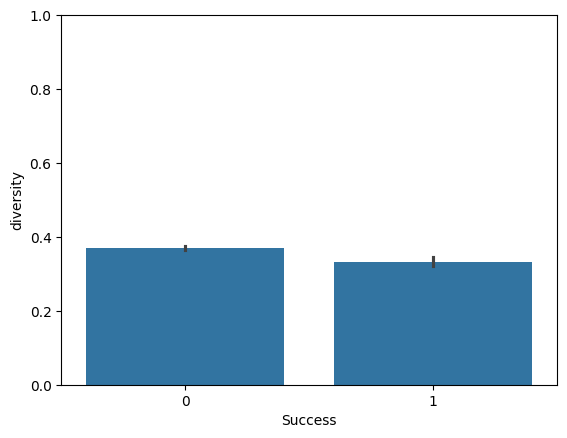

In [40]:
ax = sns.barplot(x="Success", y="diversity", data=ethnicity_sucess_df.loc[ethnicity_sucess_df['Success'].isin([0,1])])
plt.ylim([0,1])